# Healthcare
### using svm,nb,dt,rf

### svm

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("healthcare_dataset.csv")

In [12]:
df = df.drop(['Name','Date of Admission','Discharge Date'], axis=1)


In [13]:
X = df.drop('Test Results', axis=1)
y = df['Test Results']

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = SVC(kernel="rbf", random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)


SVM Accuracy: 0.335

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.35      0.42      0.38       691
Inconclusive       0.33      0.31      0.32       656
      Normal       0.32      0.27      0.29       653

    accuracy                           0.34      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.34      0.33      2000



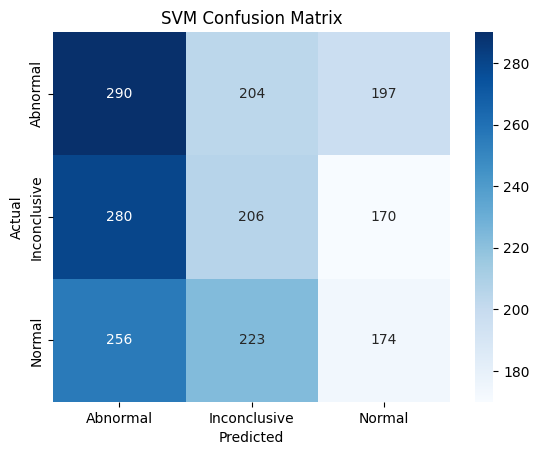

In [15]:
print("SVM Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, target_names=le_y.classes_))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### NB

In [16]:
from sklearn.naive_bayes import GaussianNB

Naive Bayes Accuracy: 0.332

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.34      0.56      0.42       691
Inconclusive       0.33      0.23      0.27       656
      Normal       0.31      0.20      0.24       653

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.31      2000
weighted avg       0.33      0.33      0.31      2000



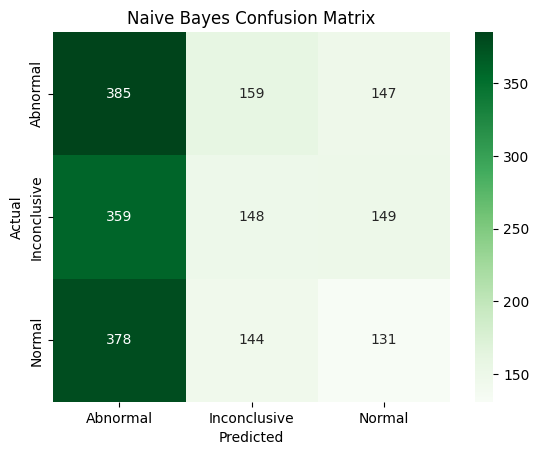

In [18]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, target_names=le_y.classes_))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### DT

In [19]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree Accuracy: 0.3415

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.36      0.37      0.37       691
Inconclusive       0.35      0.34      0.34       656
      Normal       0.31      0.31      0.31       653

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000



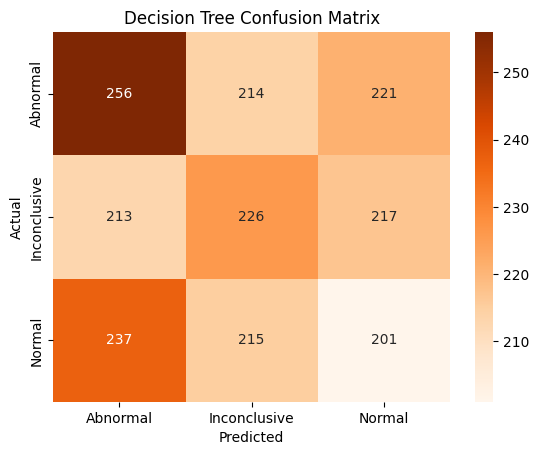

In [20]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, target_names=le_y.classes_))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### RT

In [21]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Accuracy: 0.334

Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.35      0.42      0.38       691
Inconclusive       0.31      0.27      0.29       656
      Normal       0.33      0.31      0.32       653

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000



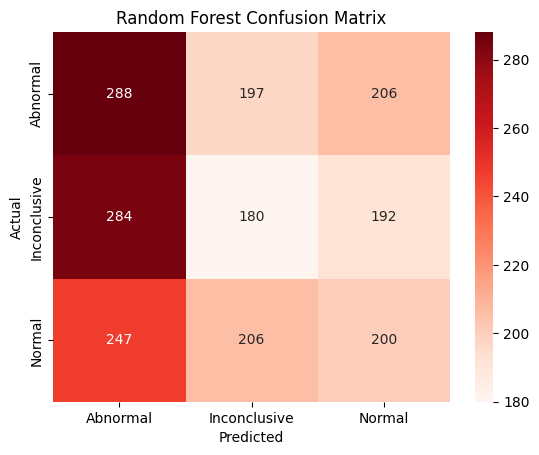

In [22]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, target_names=le_y.classes_))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

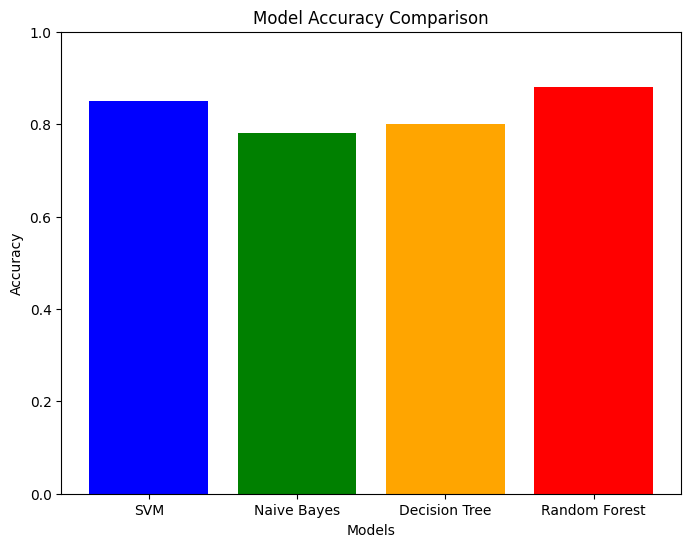

In [25]:
accuracies = {
    "SVM": 0.85,
    "Naive Bayes": 0.78,
    "Decision Tree": 0.80,
    "Random Forest": 0.88
}


plt.figure(figsize=(8,6))
plt.bar(accuracies.keys(), accuracies.values(), color=["blue","green","orange","red"])
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)  
plt.show()